#  __________________Credit Card Fraud Detection_______

### Importing Basic Libraries Pandas,Numpy and Data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Hp\Desktop\DS_work\Deep Learning\12.02_Practical Session 2\creditcarddata.csv")
df.head(2)

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,MasterCard,Tap,17.0,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,Visa,Tap,28.0,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0


### EDA-Checking dataset for anamolies, disturbances and datatypes

In [3]:
df.shape

(100000, 15)

In [4]:
df.describe()

,Time,Amount,Age,Fraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,14.559320,112.566480,53.081630,0.071900
std,5.315905,123.428493,18.742452,0.258324
min,0.000000,5.000000,21.000000,0.000000
25%,10.000000,17.000000,37.000000,0.000000
50%,15.000000,30.000000,53.000000,0.000000
75%,19.000000,208.000000,69.000000,0.000000
max,23.000000,400.000000,85.000000,1.000000


In [5]:
df.isnull().sum()

Transaction ID            0
Date                      0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

### Data has no null values or disturbances, data looks pretty clean...

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Time', 'Type of Card', 'Entry Mode',
       'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')

In [7]:
df.columns.nunique()

15

In [8]:
df2=df.iloc[:,3:15]
df2.head()

,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,MasterCard,Tap,17.0,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,Visa,Tap,28.0,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,Visa,Tap,8.0,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,MasterCard,PIN,186.0,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,Visa,PIN,86.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


In [9]:
type(list(df2.columns.unique()))

list

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type of Card            100000 non-null  object 
 1   Entry Mode              100000 non-null  object 
 2   Amount                  100000 non-null  float64
 3   Type of Transaction     100000 non-null  object 
 4   Merchant Group          100000 non-null  object 
 5   Country of Transaction  100000 non-null  object 
 6   Shipping Address        100000 non-null  object 
 7   Country of Residence    100000 non-null  object 
 8   Gender                  100000 non-null  object 
 9   Age                     100000 non-null  int64  
 10  Bank                    100000 non-null  object 
 11  Fraud                   100000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 9.2+ MB


### Used loop to get columns with their unique values

In [11]:
for i in range(len(list(df2.columns.unique()))):
        x=list(df2.columns.unique())
        y=df2[x[i]].unique()
        print(x[i],y)

Type of Card ['MasterCard' 'Visa']
Entry Mode ['Tap' 'PIN']
Amount [ 17.  28.   8. 186.  86.  24. 129.  12. 153. 295.  44. 325.  79.  21.
 113. 370. 123.   5.  47. 151. 244.  16.  23. 213. 335.  25. 305.  15.
 210. 371. 134. 336.  14. 169. 193. 393.  74.   9. 179. 338.  70.  26.
 317.  22.  89.  20.   6. 212. 102.  11. 226. 373.  75. 358. 342.  13.
 156. 360. 392. 248. 149.  19. 351.  10.  96. 361. 110. 108. 137.  39.
  29. 381. 243.  30. 344. 302.   7. 207. 144. 237.  55.  18.  27.  57.
 334. 154. 109. 322. 398. 352. 104. 375. 367. 297. 301. 165. 139. 225.
 131. 189. 115. 242.  76.  61. 346. 206. 276. 219.  38. 382.  97. 331.
 383. 292. 176. 387. 296. 271.  58. 363. 357. 259. 234.  41. 368. 251.
 182. 291.  40.  67. 200. 275. 254.  50.  90. 315. 172.  62.  60. 191.
 204. 333.  95. 282. 262. 253. 356. 209.  54. 340. 314. 232. 195.  32.
 294. 170.  80. 146. 309.  42. 178.  52.  53. 268. 223. 194. 168. 201.
 127.  87. 270. 181. 277. 261. 300. 299.  88. 391. 180. 255. 236. 318.
 400. 269.

In [12]:
df2.shape

(100000, 12)

### Dividing data in dependent and independent variables  

In [13]:
X=df2.iloc[:,0:11]
X.shape

(100000, 11)

In [14]:
y = df.iloc[:, -1]
y.shape

(100000,)

In [15]:
X.head()

,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank
0,MasterCard,Tap,17.0,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays
1,Visa,Tap,28.0,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS
2,Visa,Tap,8.0,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays
3,MasterCard,PIN,186.0,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays
4,Visa,PIN,86.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo


### Feature engineering--> Encoding categorical values, OneHotEncoded

In [16]:
x=pd.get_dummies(X)
x.head()

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,17.0,36,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,28.0,41,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8.0,32,0,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,186.0,65,1,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,86.0,61,0,1,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


### Feature engineering--> Scaling down the values to bring between 0 to 1

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
x[["Amount","Age"]]=scaler.fit_transform(x[["Amount","Age"]])

In [20]:
x.describe()

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.272320,0.501275,0.461880,0.538120,0.50163,0.49837,0.33275,0.33482,0.332430,0.106810,...,0.491230,0.508770,0.299340,0.099930,0.099560,0.099880,0.099660,0.100140,0.10103,0.100460
std,0.312477,0.292851,0.498547,0.498547,0.50000,0.50000,0.47120,0.47193,0.471087,0.308873,...,0.499926,0.499926,0.457971,0.299908,0.299414,0.299841,0.299548,0.300188,0.30137,0.300614
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.030380,0.250000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.063291,0.500000,0.000000,1.000000,1.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.513924,0.750000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [22]:
y.shape

(100000,)

In [23]:
y_2=pd.DataFrame({"Fraud": y})
y_2.shape

(100000, 1)

In [24]:
df_new=pd.concat([x,y_2],axis=1)

### Saving cleaned file as a backup

In [25]:
df_new.to_csv("Scaled,Encoded Credit card Fraud detection full dataset.csv")

## Importing Basic Libraries Pandas,Numpy and Data file to start with

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv("Scaled,Encoded Credit card Fraud detection full dataset.csv")
df.head(1)

,Unnamed: 0,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,...,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Fraud
0,0,0.03038,0.234375,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df=df.iloc[:,1:]
df.head(1)

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Fraud
0,0.03038,0.234375,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Verifying all datasets for Application of Machine Learning Algorithms

In [35]:
df.describe()

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Fraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.272320,0.501275,0.461880,0.538120,0.50163,0.49837,0.33275,0.33482,0.332430,0.106810,...,0.508770,0.299340,0.099930,0.099560,0.099880,0.099660,0.100140,0.10103,0.100460,0.071900
std,0.312477,0.292851,0.498547,0.498547,0.50000,0.50000,0.47120,0.47193,0.471087,0.308873,...,0.499926,0.457971,0.299908,0.299414,0.299841,0.299548,0.300188,0.30137,0.300614,0.258324
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.030380,0.250000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.063291,0.500000,0.000000,1.000000,1.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.513924,0.750000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### It is observed data is highly biased on Non-Fraud side

<AxesSubplot:xlabel='Fraud', ylabel='count'>

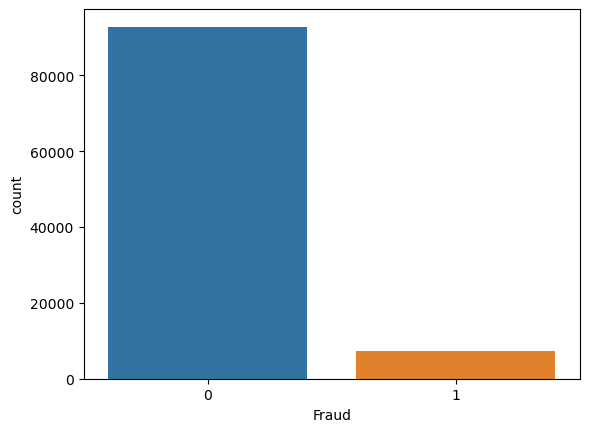

In [36]:
sns.countplot(df.iloc[:,-1])

### Understanding inter-relationships

In [82]:
df.corr()

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Fraud
Amount,1.000000,0.001335,-0.001359,0.001359,0.767967,-0.767967,-0.000660,-0.000855,0.001517,-0.004026,...,-0.000297,4.838998e-03,0.005233,-0.005702,-0.003191,-0.005398,0.005581,-0.005151,0.001239,-0.110096
Age,0.001335,1.000000,0.006618,-0.006618,-0.003054,0.003054,-0.000039,0.000139,-0.000100,0.001258,...,-0.007241,3.983830e-03,0.001865,-0.004560,-0.003549,-0.004742,0.000053,0.001004,0.003818,-0.000867
Type of Card_MasterCard,-0.001359,0.006618,1.000000,-1.000000,0.000871,-0.000871,-0.006430,0.006772,-0.000352,-0.000412,...,0.000158,-1.967253e-03,-0.001309,-0.001707,-0.001355,0.003877,0.001185,0.000973,0.001331,-0.034703
Type of Card_Visa,0.001359,-0.006618,-1.000000,1.000000,-0.000871,0.000871,0.006430,-0.006772,0.000352,0.000412,...,-0.000158,1.967253e-03,0.001309,0.001707,0.001355,-0.003877,-0.001185,-0.000973,-0.001331,0.034703
Entry Mode_PIN,0.767967,-0.003054,0.000871,-0.000871,1.000000,-1.000000,0.004680,-0.005661,0.000990,-0.005369,...,0.001383,2.410988e-03,0.003348,-0.001752,0.003517,-0.008629,0.004243,-0.004112,-0.000291,-0.152347
Entry Mode_Tap,-0.767967,0.003054,-0.000871,0.000871,-1.000000,1.000000,-0.004680,0.005661,-0.000990,0.005369,...,-0.001383,-2.410988e-03,-0.003348,0.001752,-0.003517,0.008629,-0.004243,0.004112,0.000291,0.152347
Type of Transaction_ATM,-0.000660,-0.000039,-0.006430,0.006430,0.004680,-0.004680,1.000000,-0.501015,-0.498329,-0.001656,...,0.001090,-2.898065e-03,0.004658,0.003696,0.002937,-0.004689,0.000625,-0.001322,-0.001469,-0.059108
Type of Transaction_Online,-0.000855,0.000139,0.006772,-0.006772,-0.005661,0.005661,-0.501015,1.000000,-0.500654,-0.000838,...,-0.002782,2.706641e-03,-0.006207,-0.003501,-0.000578,0.006592,-0.000486,-0.001033,0.001085,0.065019
Type of Transaction_POS,0.001517,-0.000100,-0.000352,0.000352,0.000990,-0.000990,-0.498329,-0.500654,1.000000,0.002496,...,0.001697,1.872784e-04,0.001559,-0.000190,-0.002358,-0.001913,-0.000138,0.002357,0.000382,-0.006013
Merchant Group_Children,-0.004026,0.001258,-0.000412,0.000412,-0.005369,0.005369,-0.001656,-0.000838,0.002496,1.000000,...,-0.000011,-2.562716e-03,0.003201,0.000930,0.000775,0.001246,-0.000388,0.002030,-0.003879,0.064174


<AxesSubplot:>

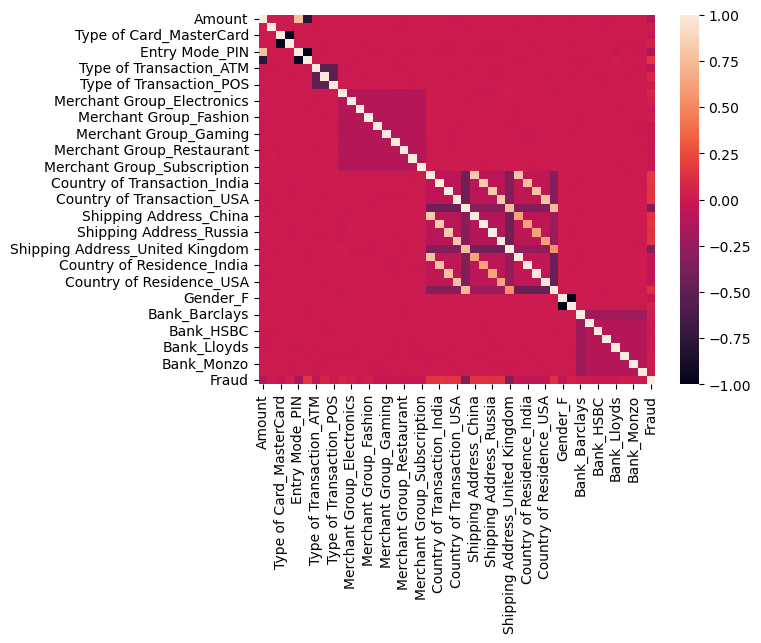

In [37]:
sns.heatmap(df.corr())

### Divided the data into x and y as dependent and independent variables

In [38]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]
x.shape,y.shape

((100000, 44), (100000,))

### Spliiting dataset and keeping 30% as testing data

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=10)

In [40]:
x_train.shape,y_test.shape

((70000, 44), (30000,))

### Applying Logistic Algorithm -ML

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

In [43]:
model.score(x_train,y_train)

0.9715142857142857

In [44]:
model.score(x_test,y_test)

0.9735333333333334

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
con=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

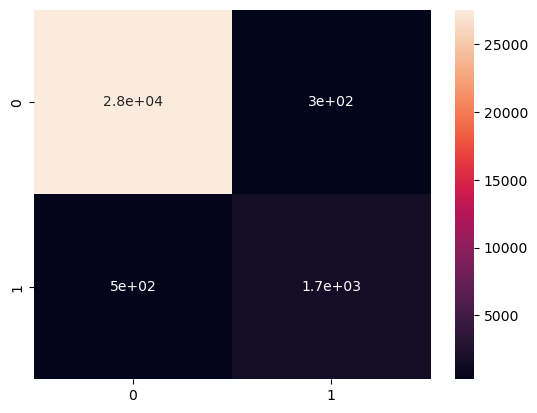

In [47]:
sns.heatmap(con,annot=True)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27826
           1       0.85      0.77      0.81      2174

    accuracy                           0.97     30000
   macro avg       0.92      0.88      0.90     30000
weighted avg       0.97      0.97      0.97     30000



### Applying Decision Tree Classifier Algorithm- ML

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
model=DecisionTreeClassifier()

In [51]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

<AxesSubplot:>

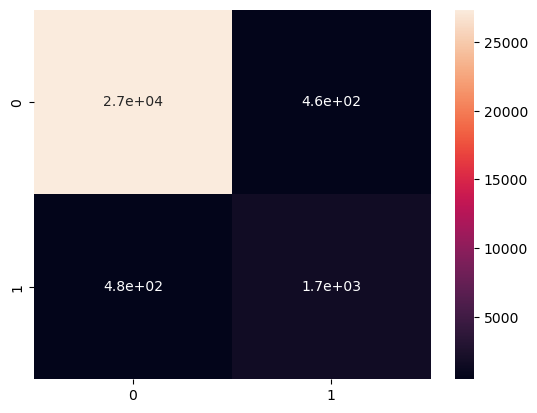

In [53]:
con=confusion_matrix(y_pred,y_test)
sns.heatmap(con,annot=True)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27812
           1       0.79      0.78      0.78      2188

    accuracy                           0.97     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.97      0.97      0.97     30000



### Applying Random Forest Classifier Algorithm-ML

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model=RandomForestClassifier()

In [57]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

In [59]:
con=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

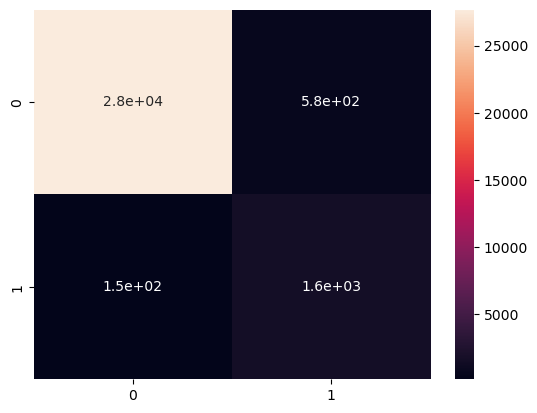

In [42]:
sns.heatmap(con,annot=True)

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28268
           1       0.73      0.92      0.81      1732

    accuracy                           0.98     30000
   macro avg       0.86      0.95      0.90     30000
weighted avg       0.98      0.98      0.98     30000



In [61]:
x_test.head()

,Amount,Age,Type of Card_MasterCard,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Merchant Group_Children,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
33226,0.577215,0.03125,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
64804,0.020253,0.93750,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
39763,0.177215,0.59375,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
51270,0.235443,0.71875,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
9698,0.060759,0.25000,1,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0


### Applying Support Vector Machine Classifier Algorithm-ML

In [62]:
from sklearn.svm import SVC

In [63]:
model=SVC()

In [64]:
model.fit(x_train,y_train)

SVC()

In [65]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

In [66]:
con=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

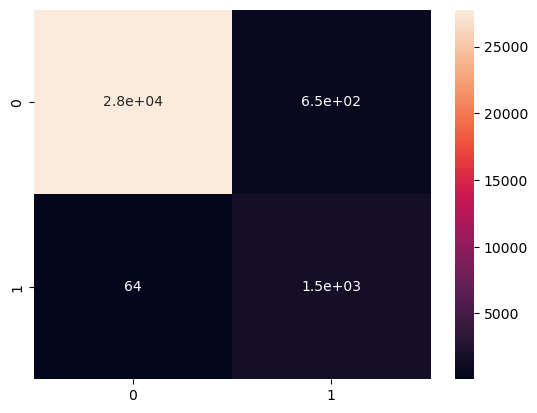

In [67]:
sns.heatmap(con,annot=True)

In [68]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28409
           1       0.70      0.96      0.81      1591

    accuracy                           0.98     30000
   macro avg       0.85      0.97      0.90     30000
weighted avg       0.98      0.98      0.98     30000



### Applying Naive Bayes Algorithm-ML

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model=GaussianNB()

In [71]:
model.fit(x_train,y_train)

GaussianNB()

In [72]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

In [73]:
con=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

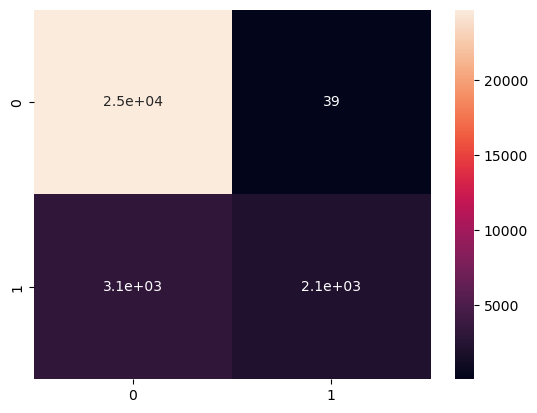

In [74]:
sns.heatmap(con,annot=True)

In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     24726
           1       0.98      0.40      0.57      5274

    accuracy                           0.89     30000
   macro avg       0.93      0.70      0.76     30000
weighted avg       0.90      0.89      0.88     30000



### Applying K nearest neighbours Classifier Algorithm -ML 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
model=KNeighborsClassifier()

In [78]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred=model.predict(x_test)

### Checking accuracies for predicted model with, confusion matrix & classification report

<AxesSubplot:>

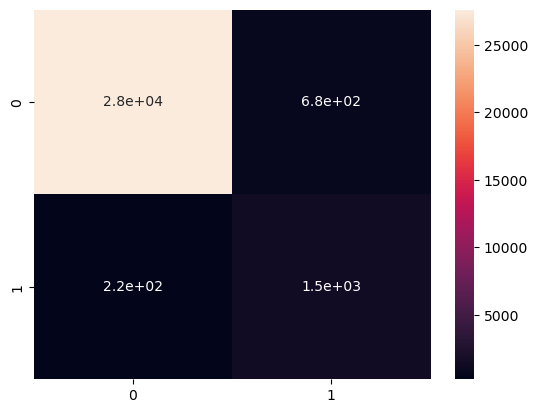

In [80]:
con=confusion_matrix(y_pred,y_test)
sns.heatmap(con,annot=True)

In [81]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     28286
           1       0.69      0.87      0.77      1714

    accuracy                           0.97     30000
   macro avg       0.84      0.92      0.88     30000
weighted avg       0.97      0.97      0.97     30000



### Insights/ Outcomes from the Activity

1. Here models have less data for training Fraud Detected("1")
2. Almost all the models are giving good precision, recall and f1-score as they are having good amount of data
3. From comaprison of Recall score Random forest proved the best algorithm of all. Logistic regression gave 0.77 recall, decision tree gave 0.78 recall and Random forest gave 0.92 recall, where all three algorithms gave almost equal F1 score.
4. Naive bayes model is giving least type 2 error amount. But, this is not enough, we should also focus on its classification report. Its F1-score for naive bayes for Frauds is just 0.57. Naive bayes model is cleary not working accurately in this dataset, as expected.
5. SVM and KNN did good in terms of recall score but they lead to decrease precision values.